# Feature engineering

- toc: true
- branch: master
- badges: true
- comments: false
- author: Kirtikumar Pandya
- categories: [fastpages, Feature engineering, Machine learning]

In [103]:
# hide 
!pip install scipy
!pip install pandas
!pip install seaborn
!pip install matplotlib

In [104]:
#hide 

# uncomment the line below to download titanic dataset.
# !mkdir data
# !wget https://raw.githubusercontent.com/pandya6988/my_first_fastpage/master/_notebooks/data/titanic.csv
# !cp titanic.csv data/.

In [105]:
# hide
import pandas as pd
from scipy import stats

## Definition

> Feature engineering is the process of transforming raw data into features that better represent the underlying signal to be fed to a machine learning model, resulting in improved model accuracy on unseen data. -- Derek Jedamski

## Loading data

We will use famous Titanic dataset. We will use `pandas` to read csv file. If your dataset is large and cannot fit to your RAM, it is advisable to use `spark`.

In [106]:
# collapse
titanic = pd.read_csv('data/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


| Variable | Defination    | Key |
|--- |----------| ------|
| Survived |	Survival |	0 = No, 1 = Yes|
| Pclass |	Ticket class |	1 = 1st, 2 = 2nd, 3 = 3rd|
| Sex |	Sex	| |
| Age |	Age  in years | |
|SibSp |	# of siblings / spouses aboard the Titanic | |
|Parch | # of parents / children aboard the Titanic | |
|Ticket |  Ticket number | |
|Fare |	Passenger fare | |
|Cabin | Cabin number | |
|Embarked |	Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

In [107]:
#collapse
print(f"Titanic dataset has {titanic.shape[0]} entries and {titanic.shape[1]} features.")

Titanic dataset has 891 entries and 12 features.


## Data Exploration

### Continuous features

If we drop all categorical variables, it will look like below (Categirocal features are important but for now we will explore continuous features):

In [108]:
# collapse
cat_feat = ['PassengerId', 'Name', 'Ticket', 'Sex', 'Cabin', 'Embarked']
titanic.drop(cat_feat, axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [109]:
# collapse
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Table above reveals that:

- Target variable `Survived` is binary with mean 0.38 which means <b>38%</b> of the people survived. Dataset is <b>not highly</b> imbalanced. In case of highly imbalanced dataset one should use oversampling or downsampling technique.
- `Pclass`, `SibSp` and `Parch` of descreate nature and have limited values.
- Titanic dataset has 819 entries but for `age` it shows only 714 entries. It means `Age` feature has <b> 177 missing values </b>. 

Now, let's explore correlation metrics. Keep in mind negative correlation is equally important as positive correlation. The features used to predict target varible should be less correlated with each other because it can confuse the model as it cannot parse out from which feature the signal is comming from. 

In [110]:
# collapse
print("Correlation matrix ⬇️")
titanic.corr()

Correlation matrix ⬇️


,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


The target varible `Survived` has positive correlation with feature `Fare`. Passengers who bought costly ticket has higher chace of survival.

`Fare` and `Pclass` have negative correlation. It means ticket class 1 is the costliest and 3 is the cheapest. 

In [111]:
# collapse_show
titanic.groupby('Pclass')['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


75 percentile of Pclass-1 > 75 percentile of Pclass-2 75 percentile of Pclass-3

In [112]:
# collapse
def describe_count_feature(feature):
    print(f"\n****** Result for {feature} ******")
    print(titanic.groupby('Survived')[feature].describe() )
    ttest(feature)
    
def ttest(feature):
    survived_feature = titanic[titanic.Survived == 1] [feature]
    not_survived_feature = titanic[titanic.Survived == 0] [feature]
    tstat, pval = stats.ttest_ind(survived_feature, not_survived_feature, equal_var=False)
    print(f"t-statistic: {tstat:.1f}, P-Vale: {pval:.3f}")
    
for feature in titanic.columns.drop('Survived'):
    describe_count_feature(feature)


****** Result for Pclass ******
          count      mean       std  min  25%  50%  75%  max
Survived                                                    
0         549.0  2.531876  0.735805  1.0  2.0  3.0  3.0  3.0
1         342.0  1.950292  0.863321  1.0  1.0  2.0  3.0  3.0
t-statistic: -10.3, P-Vale: 0.000

****** Result for Age ******
          count       mean        std   min   25%   50%   75%   max
Survived                                                           
0         424.0  30.626179  14.172110  1.00  21.0  28.0  39.0  74.0
1         290.0  28.343690  14.950952  0.42  19.0  28.0  36.0  80.0
t-statistic: nan, P-Vale: nan

****** Result for SibSp ******
          count      mean       std  min  25%  50%  75%  max
Survived                                                    
0         549.0  0.553734  1.288399  0.0  0.0  0.0  1.0  8.0
1         342.0  0.473684  0.708688  0.0  0.0  0.0  1.0  4.0
t-statistic: -1.2, P-Vale: 0.233

****** Result for Parch ******
          count 

Interestigly, <b>result for Fare</b> shows that average ticket cost of the survived passangers is higher than the passangers who did not surive. Similar difference can be observed for mean, median and inter quantile ranges. 

Average age of the survived passenger ➡️ 30.63 years <br>
Average age of the non-survived passenger ➡️ 28.34 years <br> 
However, 50 percentile for survived and not survived is the same.

We saw above that `Age` has 177 missing value. It is important to understand if the age is missing for certain group of people <u> OR</u> it is missing in systematic fasion. This will decide how we will handle the missing value.

In [113]:
# collapse
print(titanic.groupby(titanic.Age.isnull()).mean())
print('-----------')
print("⬆️ True indicates missing value.")

       Survived    Pclass        Age     SibSp     Parch       Fare
Age                                                                
False  0.406162  2.236695  29.699118  0.512605  0.431373  34.694514
True   0.293785  2.598870        NaN  0.564972  0.180791  22.158567
-----------
⬆️ True indicates missing value.


People without age reported are less likely to be survived, fewer parents/children, slightly higher class number and less fare.

### Visualize continuous features

Next, Let's plot the data to understand the distribution and the target variable.

In [114]:
# hide
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

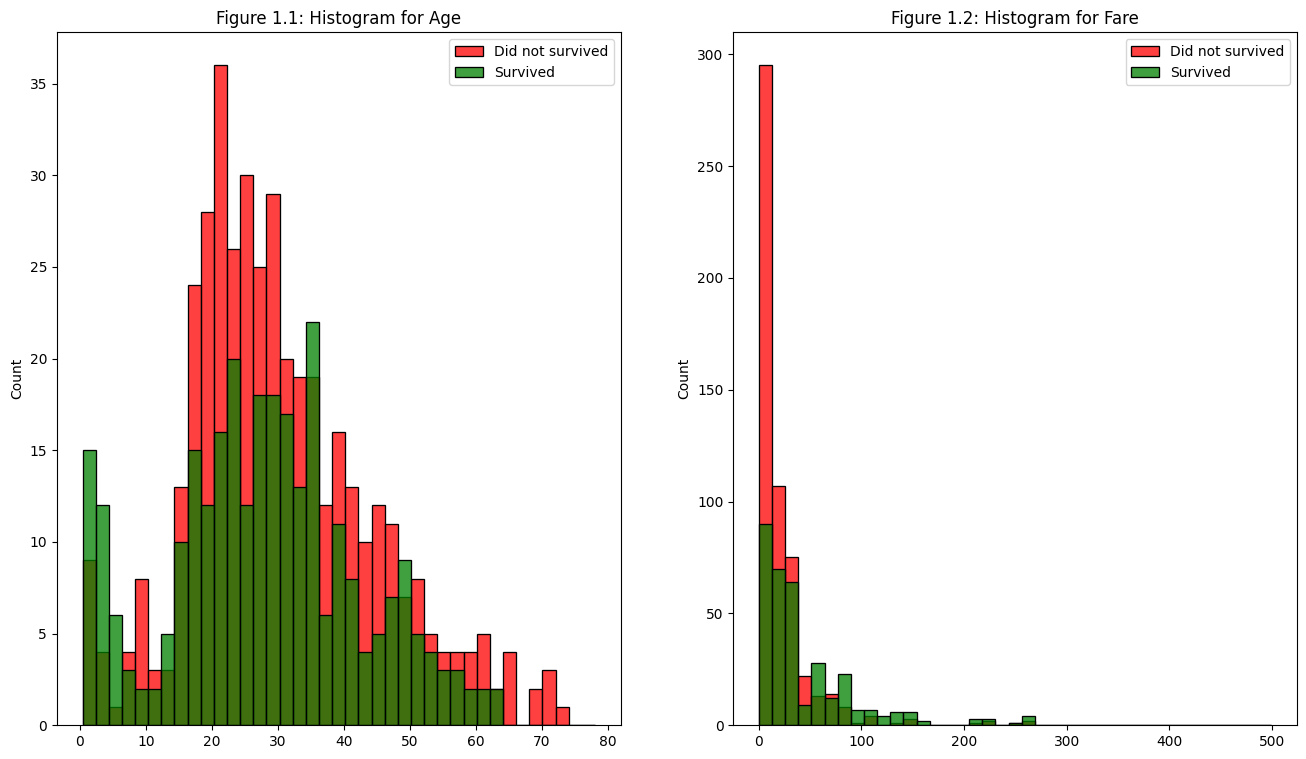

In [115]:
# collapse
fig, axs = plt.subplots(ncols=2, figsize=(16,9))
axs_no = 0

for feature in ['Age', 'Fare']:
    died = list(titanic[titanic.Survived == 0][feature].dropna())
    survived = list(titanic[titanic.Survived == 1][feature].dropna())
    xmin = min(min(died), min(survived))
    xmax = max( max(died), max(survived) )
    width = (xmax - xmin) / 40
    sns.histplot(died, color='r', kde=False, bins=np.arange(xmin, xmax, width), ax=axs[axs_no])
    sns.histplot(survived, color='g', kde=False, bins=np.arange(xmin, xmax, width), ax=axs[axs_no])
    axs[axs_no].set_title(f"Figure 1.{axs_no+1}: Histogram for {feature}")
    axs[axs_no].legend(['Did not survived', 'Survived'])
    axs_no += 1

Previously, by observing averages and 50 percitles of `Age` feature, We saw almost no difference between who survived and who did not. The histogram of age distribution above confirms that (<b>Figure 1.1</b>). 

<p> For `Fare` we saw drastic difference between means: 

- Mean `Fare` for people who survived ➡️ ~48
- Mean `Fare` people who did not survived ➡️ ~22 

<u>The overlaid histogram (<b>Figure 1.2</b>) highlights the  caution you have to take with looking only at averages instead of full distribution.</u> Except first bin of the histogram, the likelihood of surviving versus not surviving is very similar. For example in case of the second bin, we can observe $\approx$ 105 for people who did not survivde and $\approx$ 70 for people who survivde. 

The histogram for `Fare` (<b>Figure 1.2</b>) shows the <b>small</b> difference between two distribution unlike we observed by comparing mean values. The big difference between mean values is impected by some outliers. 

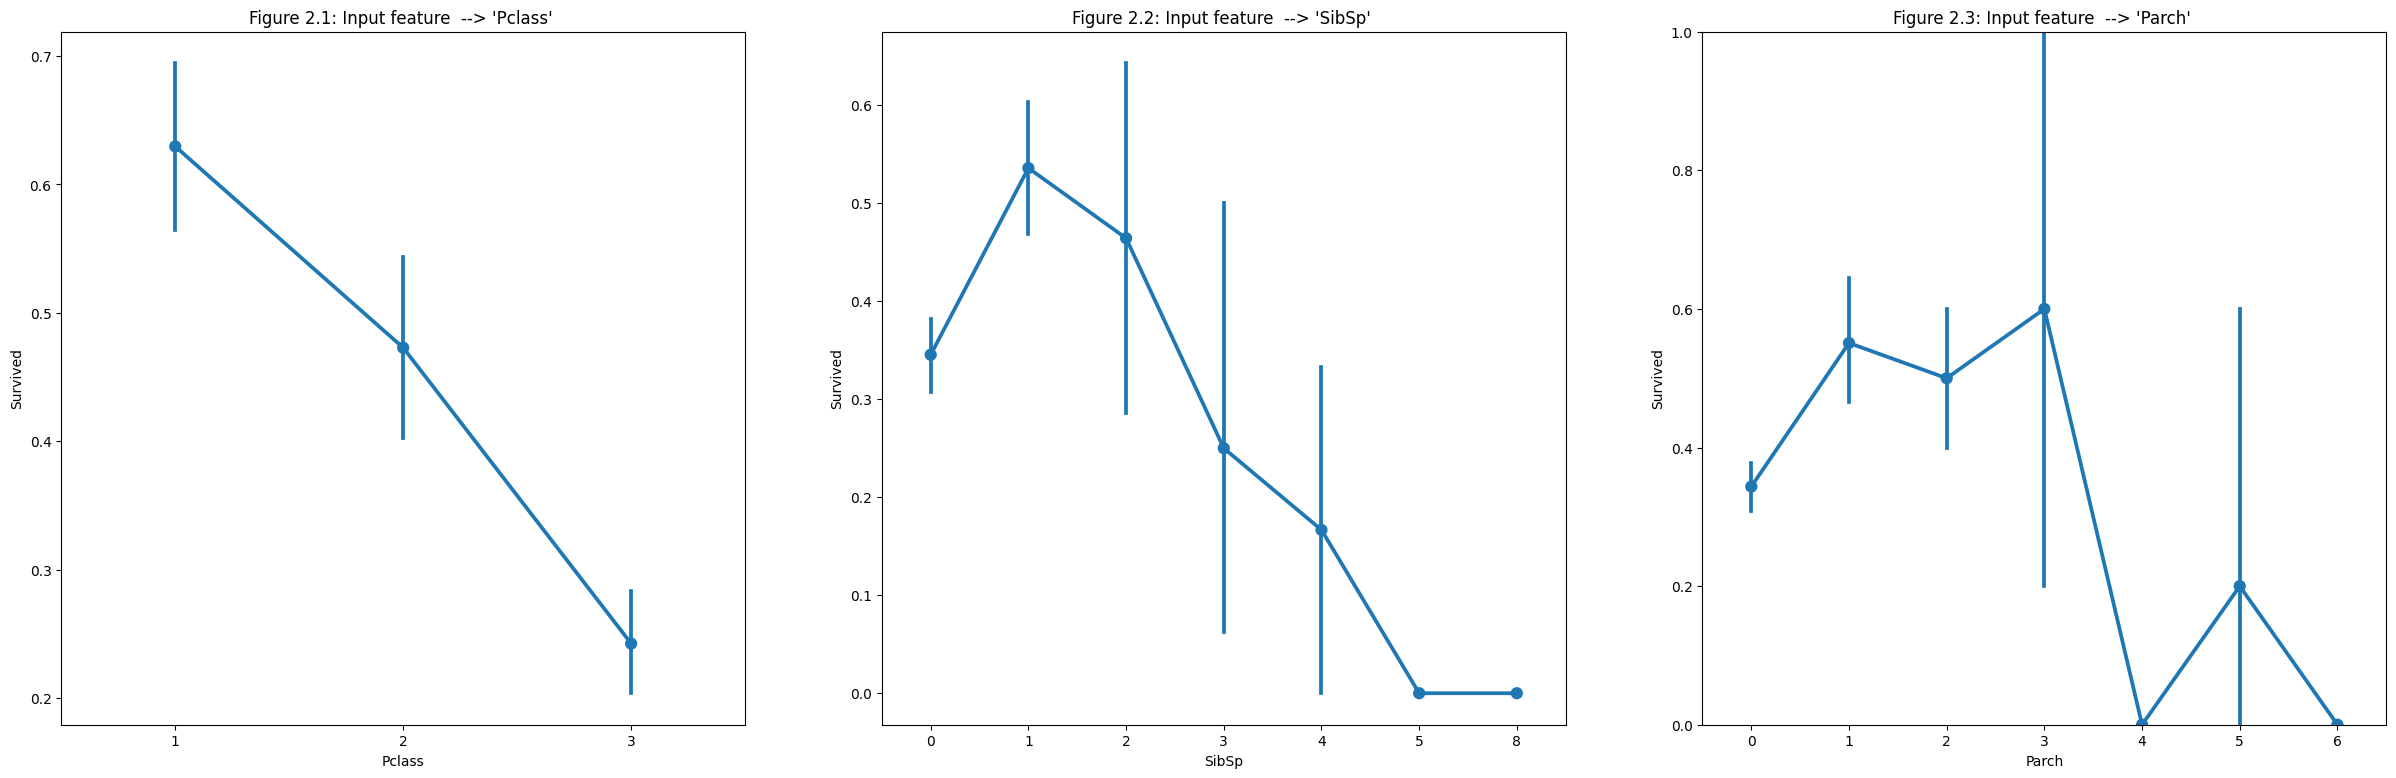

In [116]:
# collapse

fig, axs = plt.subplots(ncols=3, figsize=(30,9))
axs_no = 0
ordinal_features = ['Pclass', 'SibSp', 'Parch']

for feature in ordinal_features:
    sns.pointplot(x=feature, y='Survived', data=titanic, ax=axs[axs_no])
    axs[axs_no].set_title(f"Figure 2.{axs_no+1}: Input feature  --> '{feature}' ")
    axs_no += 1
    plt.ylim(0,1)

Figure 2.x shows the percentage of people survived at each level of the input feature. The verticle lines represent the confidence level. Input with limited examples will reseult into bigger line and represent less confidence. 

Figure 2.1 depicts that first class passengers (`Pclass`=1) are the most likely to survive (around 64% probability) and third class passengers are the least likely to survive. Here, we can see the clear trend. 

<i>Likelihood of first class passenger survive</i> <b>></b> <i>Likelihood of second class passenger survive</i> <b>></b> <i>Likelihood of third class passenger survive</i>

Figure 2.2 and figure 2.3 shows that as number of family mamber increases the likelyhood of survining is reduced. Both plots almost similar trend therefore we can combine these two feature and reduce redandency. We have combined features `SibSp` and `Parch` and added new feature called `family_members`.

family members = (number of siblings / spouses aboard the Titanic) + (number of parents / children aboard the Titanic)

$family\_member = SibSp + Parch$

We will decide later whether we should use reduced feature (`family_members`) <u>OR</u> use two separate features.

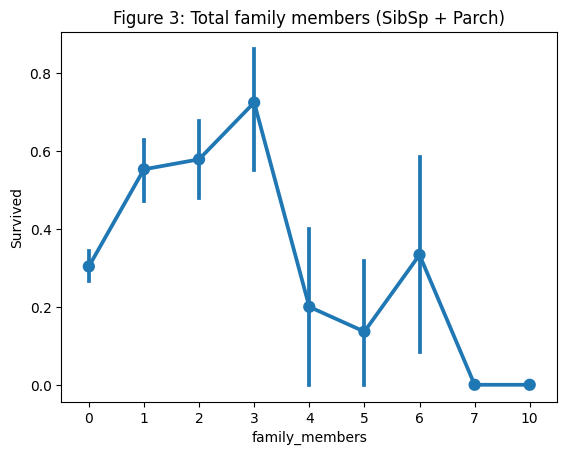

In [117]:
# collapse

titanic['family_members'] = titanic['SibSp'] + titanic['Parch']
sns.pointplot(x='family_members', y='Survived', data=titanic)
plt.title(f"Figure 3: Total family members (SibSp + Parch)")
plt.show()

We can observe from figure 3 that the probability of surving increase till three `family_members` and after that we are observing sudden drop in the values. It is worth further investigating this plot for better undestanding. 

### Categirocal features

Now, Let's explore the categorical fatures and drop continuous features and consider categorical features.

In [118]:
# collapse

titanic = pd.read_csv('data/titanic.csv')
continuous_features = ['Pclass', 'SibSp', 'Parch', 'Fare', 'Age', 'PassengerId']
titanic.drop(columns=continuous_features, axis=1, inplace=True)
categorical_features = list(titanic.columns)
titanic.head()

,Survived,Name,Sex,Ticket,Cabin,Embarked
0,0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,1,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,0,"Allen, Mr. William Henry",male,373450,NaN,S


In [119]:
# collapse

print("⬇️ Total NaN values for each categorical feature.")
print(titanic.isnull().sum())

⬇️ Total NaN values for each categorical feature.
Survived      0
Name          0
Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64


Now, we will see number of unique value for each categorical feature. 

In [120]:
# collapse
number_of_unique_values = dict()
for feature in titanic.drop('Survived', axis=1).columns:
    number_of_unique_values[feature] = titanic[feature].nunique()

data = np.array([list(number_of_unique_values.keys()), list(number_of_unique_values.values())])
pd.DataFrame(data=data.T, columns=['features', '# of unique values'])

,features,# of unique values
0,Name,891
1,Sex,2
2,Ticket,681
3,Cabin,147
4,Embarked,3


For the `Cabin` feature we have 687 NaN values (out of 891 entries).  From 204 available values 147 are unique. At first glace this feature does not look useful for the prediction. Let's further investigate this feature for better understanding.

In [121]:
# collapse
print(titanic.groupby(titanic.Cabin.isnull()).mean())
print("⬆️ True indicates the missing value.")

       Survived
Cabin          
False  0.666667
True   0.299854
⬆️ True indicates the missing value.


The code cell above reveals that only $\approx$ 30% passengers without Cabin information could servive. What could have happened that actually no cabin was allocated to few passengers and they were sleeping at one place. Here, reason is not important. We can replace this feature with `Cabin_info` feature which represents that whether the `Cabin` information is available or not. `Cabin_info` can be seen as feature with binary value.

In [122]:
titanic['Cabin_info'] = np.where(titanic.Cabin.isnull(), 0, 1)

Titanic dataset has 681 unique ticket values out of 891 values with 0 NaN value. From this feature we will not get any useful signal and therefore we will drop it. Reader can explore this feature further (small exercise if you are interested).

Next, Let's investigate the feature `Name`. Logically, Name cannot have any influence whether he survived or not. However, if the passenger has special title (like Dr., prof. etc.), it can give him special previlages. It is worth exploring.

In [123]:
# collapse
print("5 most common titles ⬇️")
titanic['Title_raw'] = titanic.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

titanic.pivot_table('Survived', index=['Title_raw', 'Sex'], aggfunc=['count', 'mean']).sort_values([( 'count', 'Survived')], ascending=False) [:5]

5 most common titles ⬇️


,,count,mean
,,Survived,Survived
Title_raw,Sex,,
Mr,male,517,0.156673
Miss,female,182,0.697802
Mrs,female,125,0.792000
Master,male,40,0.575000
Rev,male,6,0.000000


The pivot table above reveals that the name with title "Mrs" has $\approx$ 80% chance of survival, name with title "Miss" has $\approx$ 70% of chance of survival. We will keep the 4 most common titles and group the others (please refer feature `Title` in the dataframe below).

In [124]:
# collapse

titanic['Title'] = titanic.Title_raw.apply(lambda x: x if x in ['Mr', 'Miss', 'Mrs', 'Master'] else 'other')
titanic.drop(['Name', 'Ticket', 'Cabin', 'Title_raw'],axis=1).sample(frac=1).reset_index(drop=True). head(8)

,Survived,Sex,Embarked,Cabin_info,Title
0,1,male,S,0,Mr
1,1,female,C,1,Mrs
2,1,male,S,0,Mr
3,1,female,C,1,Mrs
4,0,male,Q,0,Mr
5,1,female,S,1,Mrs
6,1,female,S,1,Miss
7,1,female,S,1,Mrs


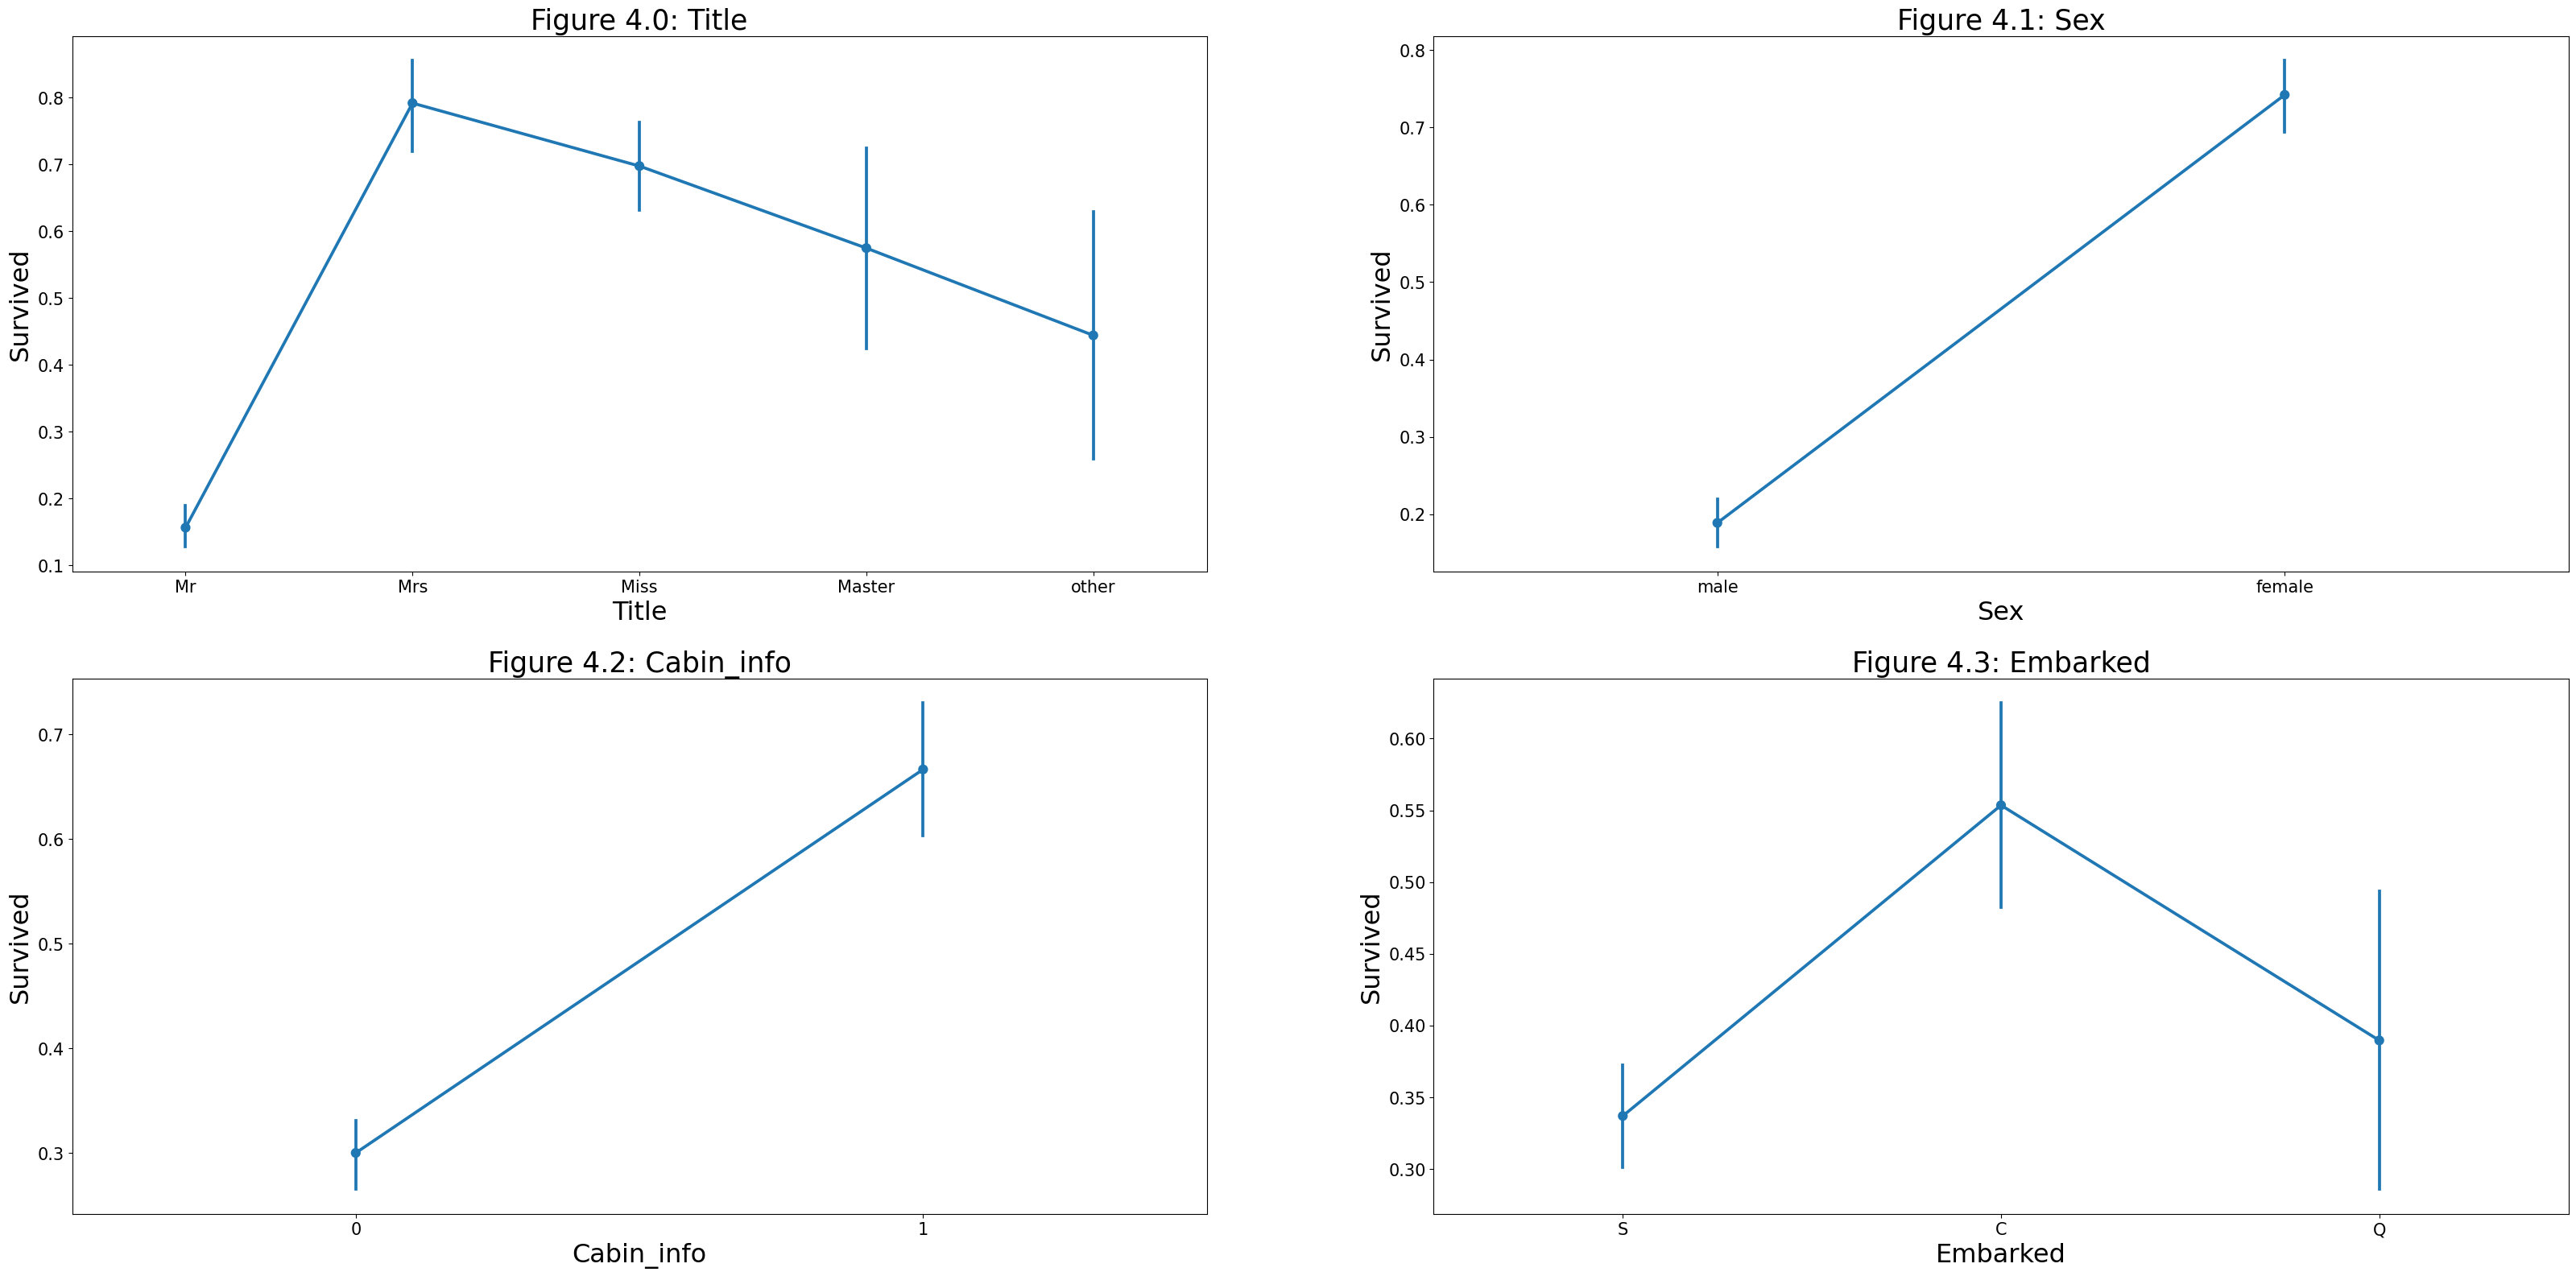

In [127]:
# collapse

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(40,19))
axs_no = 0
n_row = 0
n_col = 0
for feature in ['Title', 'Sex', 'Cabin_info', 'Embarked']:
    axs[n_row][n_col].tick_params(axis='x', labelsize=15)
    axs[n_row][n_col].tick_params(axis='y', labelsize=15)
    sns.pointplot(x=feature, y='Survived', data=titanic, ax=axs[n_row][n_col])
    axs[n_row][n_col].set_title(f"Figure 4.{axs_no}: {feature}", fontsize=25)
    axs[n_row][n_col].set_xlabel(f'{feature}', fontsize=23)
    axs[n_row][n_col].set_ylabel('Survived', fontsize=23)
    axs_no += 1
    n_row = 1 if axs_no > 1 else 0
    n_col = 1 if n_col == 0 else 0
    

Likelihood of survival cannot be dependent on embarkation port. Passengers from one port can be richer than other ports and therefore they can afford titcket with cabin (Pivot table below confirms our hypothesis). However, we are considering `Cabin_info` saperatly and therefore we can ignore `Embarked` feature. We will drop feature shown in figure 4.3.

In [126]:
# collapse

titanic.pivot_table('Survived', index=['Cabin_info'], columns=['Embarked'], aggfunc='count')

Embarked,C,Q,S
Cabin_info,,,
0,99,73,515
1,69,4,129


### Summary

- <b>Name</b> &nbsp; : Name on its own was not very valuable. Somebody's name probably didn't determine whether they are likely to survive. However, name title can be the proxy for a status and likely is related to whether they survive or not. Therefore, we have decided `Title` is more useful feature than `Name`.
- <b>Pclass</b> &nbsp; : <i>Likelihood of first class passenger survive</i> <b>></b> <i>Likelihood of second class passenger survive</i> <b>></b> <i>Likelihood of third class passenger survive</i> (<b>as shown in figure 2.1</b>). 
- <b>Sex</b> &nbsp;: Female has $\approx$ 74% chance of survival and male has only $\approx$ 19% chance of survival (<b>as shown in figure 4.1</b>).
- <b>Age</b> &nbsp;: As shown in figure 1.1 `Age` distribution for both cases (survived and not survived) are the same. 
- <b>SibSp + Parch </b>&nbsp;: We realized that these two features tells the same story and therefore we have decided to combine those into one feature.
- <b>Ticket</b> &nbsp;: We validated that ticket number is random and does not provide any important information. 
- <b>Fare</b> &nbsp;: It is more correlated to `Pclass`. In future we can investigate if we can use only one of these features to achieve same or better accuracy. 
- <b>Cabin</b> &nbsp;: Cabin is missing for more than 75% passengers. We could have assumed that it is missing randomly and drop the entire feature. However, we uncovered the fact that the there was a strong correlation whether the cabin was missing and survival rate. Therefore, we converted this categorical feature to binary indicator that seems to be very powerful predictor or whether a pessanger survived. 
- <b>Embarked</b> &nbsp;: We have concluded that it is not a causal factor. It is likely correlated with some other feature and that other feature is probably the driving factor here. 
